In [2]:
# Realizar as importações
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import cv2

In [3]:
# Funções úteis

def mostrar(image : np.ndarray, cmap1 = None, title = "Imagem", orig : np.ndarray = None, cmap2 = None):

    if orig is not None:
        plt.figure(figsize=(20,10))
        plt.subplot(1,2,2)
        plt.imshow(orig, cmap=cmap2)
        plt.title(title + " Original")
        plt.axis('off')
        plt.subplot(1,2,1)
        plt.imshow(image, cmap=cmap1)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        plt.figure(figsize=(10,10))
        plt.imshow(image, cmap=cmap1)
        plt.title(title)
        plt.axis('off')
        plt.show()

def mostrar_histograma(image : np.ndarray, title = "Histograma", orig : np.ndarray = None):
    if orig is not None:
        plt.figure(figsize=(20,10))
        plt.subplot(1,2,2)
        plt.hist(orig.ravel(), bins=256, range=(0, 256))
        plt.xlim([-1, np.max(orig) + 10])
        plt.title(title + " Original")
        plt.subplot(1,2,1)
        plt.hist(image.ravel(), bins=256, range=(0, 256))
        plt.xlim([-1, np.max(image) + 10])
        plt.title(title)
        plt.show()
    else:
        plt.hist(image.ravel(), bins=256, range=(0, 256))
        plt.title(title)
        plt.xlim([-1, np.max(image) + 10])
        plt.show()

def conv_escala(image : np.ndarray) -> np.ndarray:
    min = np.min(image)
    max = np.max(image)
    print("min: ", min)
    print("max: ", max)
    image = ((image - min) * 255) // (max - min)
    min = np.min(image)
    max = np.max(image)
    print("min: ", min)
    print("max: ", max)
    return image

# 1.1 - Esboço a Lápis

Implementar um efeito de esboço a l apis em uma imagem por meio dos seguintes passos: 
(i)converter a imagem colorida para níveis de cinza,
(ii) aplicar um filtro de desfoque gaussiano,(por exemplo, com uma máscara de 21×21 pixels) para suavizar os detalhes da imagem,
(iii) dividir a imagem em tons de cinza pela versão desfocada para realçar os contornos

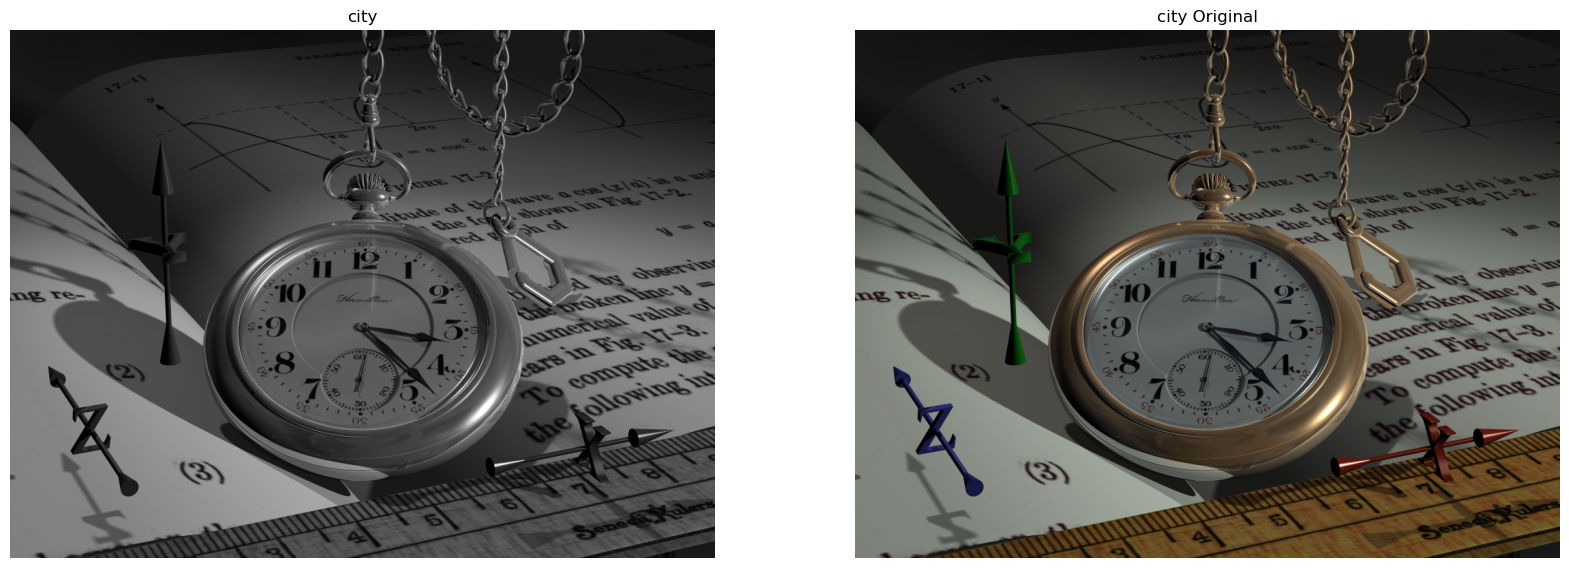

In [ ]:
nome = 'watch'
imagem = cv2.imread('../images/' + nome + '.png', cv2.IMREAD_COLOR)
imagem_orig = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_orig = imagem_orig.astype(np.int16)
imagem_gray = imagem_gray.astype(np.int16)
mostrar(imagem_gray, title= 'city', orig=imagem_orig, cmap1='gray')

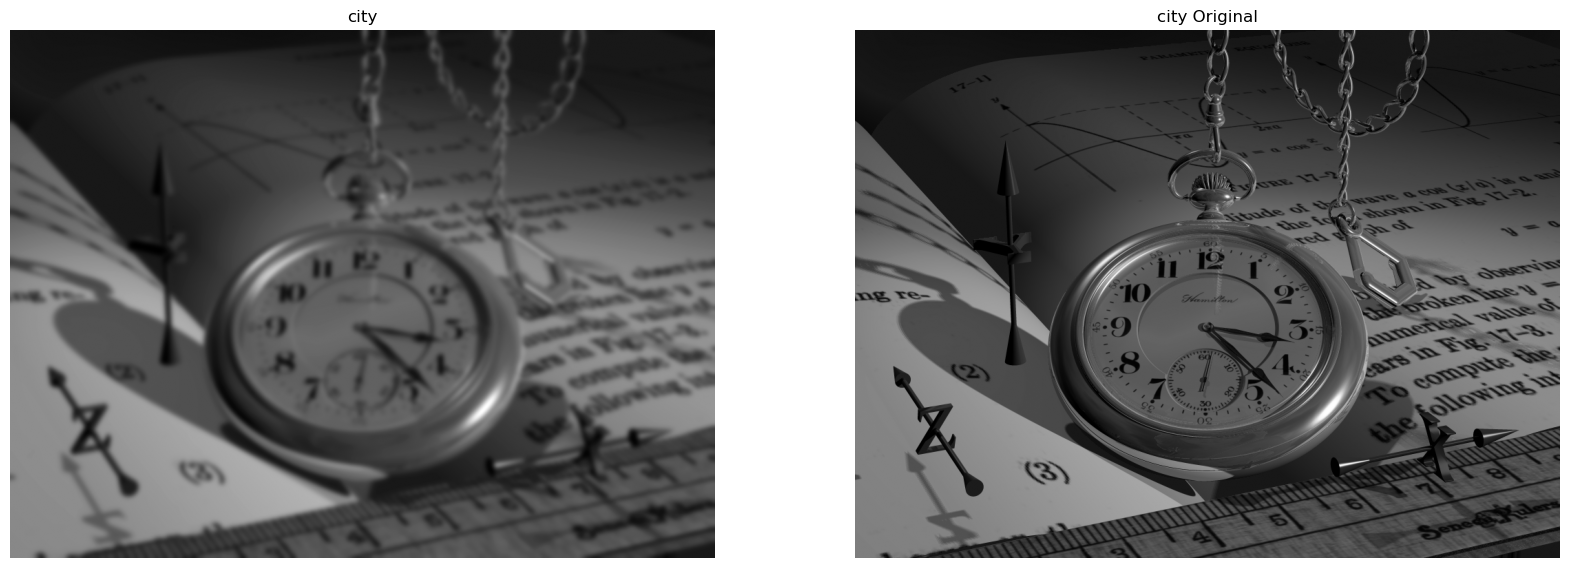

In [33]:
t_mask = 21
imagem_desfocada= cv2.GaussianBlur(imagem_gray, (t_mask, t_mask), 0, borderType=cv2.BORDER_REFLECT)
imagem_gray[imagem_gray == 0] = 1
imagem_desfocada[imagem_desfocada == 0] = 1
mostrar(imagem_desfocada, title= 'city', orig=imagem_gray, cmap1='gray', cmap2='gray')

min:  0.010752688172043012
max:  6.32258064516129
min:  0.0
max:  255.0


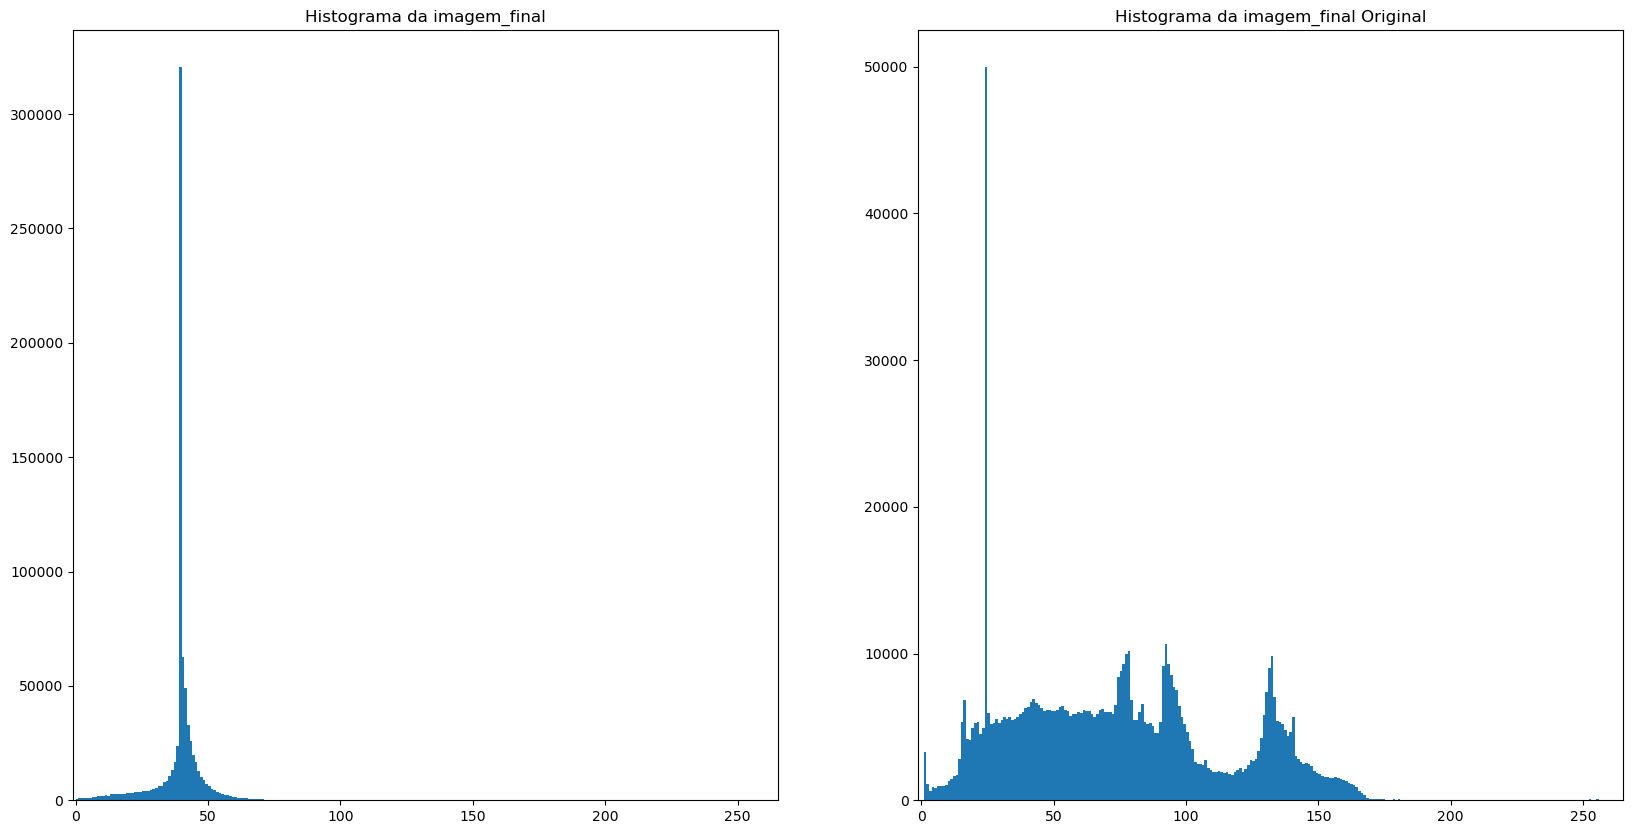

min:  10
max:  40
min:  0
max:  255


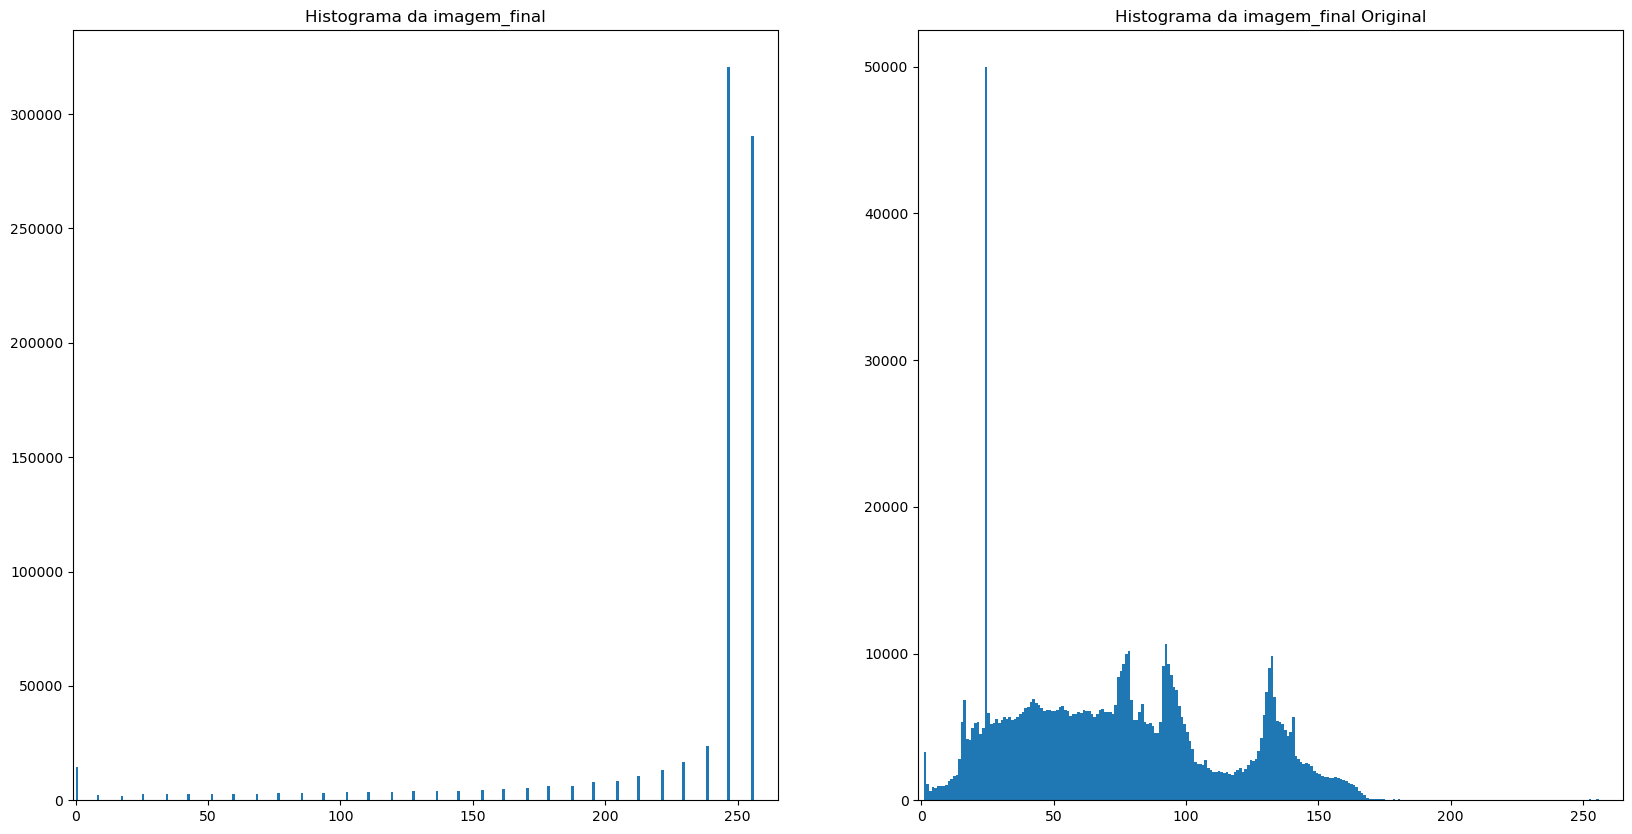

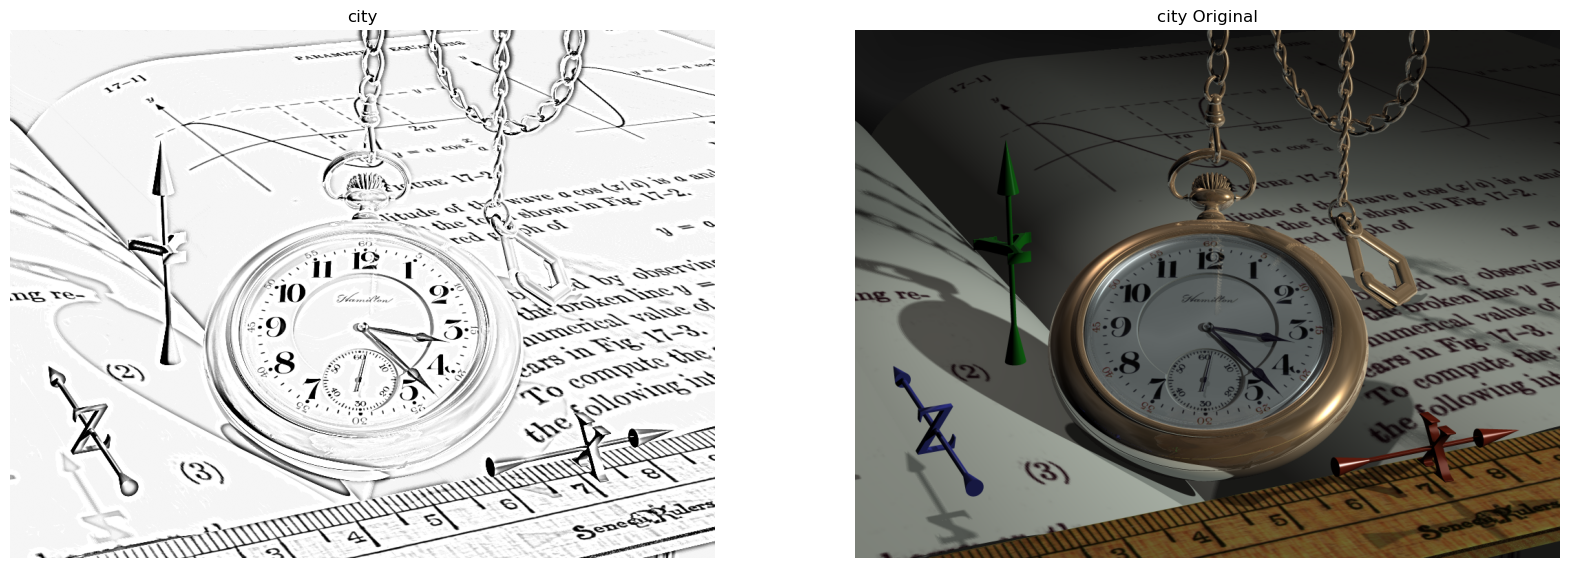

In [34]:
imagem_final = imagem_gray / imagem_desfocada



imagem_final = conv_escala(imagem_final)
imagem_final = imagem_final.astype(np.uint16)

mostrar_histograma(imagem_final, title= 'Histograma da imagem_final', orig=imagem_gray)

imagem_final = np.clip(imagem_final, 10, 40) #watch 10, 40
imagem_final = conv_escala(imagem_final)
mostrar_histograma(imagem_final, title= 'Histograma da imagem_final', orig=imagem_gray)

mostrar(imagem_final, title= 'city', orig=imagem_orig, cmap1='gray')

# 1.2 Ajuste de Brilho
Aplicar a correção gama para ajustar o brilho de uma imagem monocromatica A de entrada e gerar
uma imagem monocromatica B de saída. A transformação pode ser realizada 
(i) convertendo-se as intensidades dos pixels para o intervalo de [0,255] para [0,1]
(ii) aplicando-se a equação B = A^(1/y) e 
(iii) convertendo-se os valores resultantes de volta para o intervalo [0,255]. 
Realizar a correção com diferentes valores de y.
(a) imagem (b) y = 1.5 (c) y = 2.5 (d) y = 3.5

In [ ]:
nome = 'watch'
imagem = cv2.imread('../images/' + nome + '.png', cv2.IMREAD_COLOR)
imagem_orig = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_orig = imagem_orig.astype(np.int16)
imagem_gray = imagem_gray.astype(np.int16)

# 1.3 Mosaico
Construir um mosaico de 4×4 blocos a partir de uma imagem monocromática. A disposição dos
blocos deve seguir a numeração mostrada na figura (c).

In [68]:
nome = 'butterfly'
imagem = cv2.imread('../images/' + nome + '.png', cv2.IMREAD_GRAYSCALE)
shape = imagem.shape
print(shape)
imagem_gray = imagem.astype(np.int16)

(512, 512)


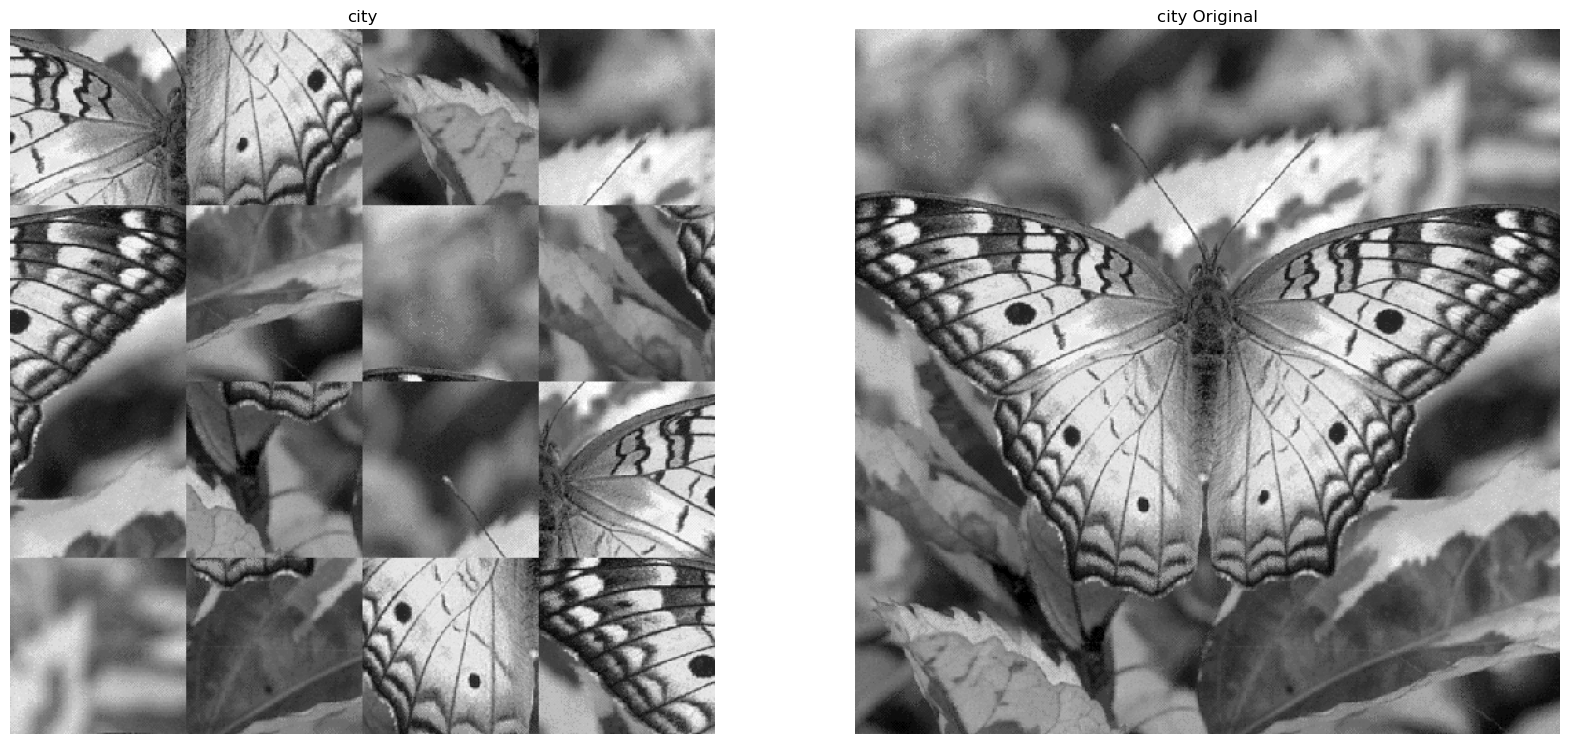

In [ ]:
#Disposição dos blocos:
destino = [6, 10, 3, 12, 15, 0, 11, 4, 7, 14, 1, 8, 2, 9, 13, 5]
destino = np.array(destino)
origem = np.arange(16)

cortes_destino = [((shape[0]//4) * (i//4), (shape[0]//4) * ((i//4) + 1) , (shape[1]//4) * (i%4), (shape[1]//4) * ((i%4) + 1) ) for i in destino]
cortes_destino = np.array(cortes_destino)
cortes_destino = cortes_destino.astype(np.int16)

cortes_origem = [((shape[0]//4) * (i//4), (shape[0]//4) * ((i//4) + 1) , (shape[1]//4) * (i%4), (shape[1]//4) * ((i%4) + 1) ) for i in origem]
cortes_origem = np.array(cortes_origem)
cortes_origem = cortes_origem.astype(np.int16)

imagem_final = np.zeros(imagem_gray.shape, dtype=np.int16)
for i in range(len(destino)):
    imagem_final[cortes_destino[i][0]:cortes_destino[i][1], cortes_destino[i][2]:cortes_destino[i][3]] = imagem_gray[cortes_origem[i][0]:cortes_origem[i][1], cortes_origem[i][2]:cortes_origem[i][3]]
mostrar(imagem_final, title= 'city', orig=imagem_gray, cmap1='gray', cmap2='gray')